<a href="https://colab.research.google.com/github/Emmanuel2000x/Statistics-ML-G8/blob/main/Clasificacion_validacion_y_metricas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color='dark'>**Clasificación: Validación de modelos y métricas de evaluación**</h1>

### Proyecto

Una empresa de financiamiento de automóviles está atravesando una situación complicada, con una alta demanda para una flota reducida de vehículos y un alto número de morosos, lo que está generando grandes pérdidas para la empresa.

Nosotros fuimos contratados para buscar mejoras en la identificación de morosos. El análisis de los clientes actualmente se realiza de forma manual, cliente por cliente, lo que consume mucho tiempo y, aun así, la detección de morosos es muy imprecisa.

Nuestra tarea es utilizar los datos proporcionados por la empresa para **clasificar** a los clientes en cumplidores y morosos.

## <font color='dark'>Clasificando los datos</h1>

### Creando un modelo inicial

In [ ]:
import pandas as pd


In [ ]:
DF = pd.read_csv('/content/prestacar.csv')

In [ ]:
DF.head()

,ingresos_cliente,anualidad_prestamo,años_casa_propia,telefono_trab,evaluacion_ciudad,score_1,score_2,score_3,score_social,cambio_telefono,moroso
0,12600.0,3569.400000,12.157324,1,2.0,0.057153,0.527227,0.513171,0.117428,2545.0,0
1,9000.0,2722.188351,7.000000,0,2.0,0.657661,0.285898,0.614414,0.222700,495.0,0
2,15750.0,4477.500000,12.000000,0,2.0,0.501213,0.695423,0.513171,0.117428,1212.0,0
3,9000.0,1309.050000,12.157324,0,3.0,0.501213,0.155973,0.513171,0.117428,515.0,0
4,7650.0,1125.000000,12.157324,0,2.0,0.294328,0.152076,0.513171,0.117428,162.0,0


In [ ]:
X = DF.drop(columns='moroso')
y = DF.moroso

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
modelo = DecisionTreeClassifier()
modelo.fit(X,y)

DecisionTreeClassifier()

In [ ]:
modelo.score(X,y)

1.0

### Validando el modelo

Evaluar el modelo con los mismos datos utilizados en el entrenamiento no es recomendable. Es necesario que la evaluación se realice con datos independientes.  

Evaluar el modelo con los propios datos de entrenamiento sería equivalente a entregar un examen con las preguntas y las respuestas a una persona y, al momento de evaluarla nuevamente, entregarle un examen con las mismas preguntas y opciones. Se espera que esa persona obtenga un buen resultado, ya que ya ha visto las respuestas y ha memorizado el resultado. Esto es diferente de haber aprendido la materia a partir de ese examen y luego presentar una prueba con contenido similar y obtener un resultado positivo.  

Con el objetivo de verificar la capacidad de generalización de un modelo, debemos dividir el conjunto de datos en tres partes: datos de entrenamiento, validación y prueba.  

- El **conjunto de entrenamiento** se utiliza para entrenar los modelos. A partir de este conjunto, los modelos identifican patrones en los datos.  

- El **conjunto de validación** se emplea para evaluar el desempeño de diferentes modelos con datos nuevos que no fueron utilizados en el entrenamiento.  

- El **conjunto de prueba** se mantiene separado desde el inicio para simular datos del mundo real. No se utiliza en ninguna etapa del entrenamiento ni de la validación, sirviendo como una estimación de la capacidad del modelo elegido para generalizar y predecir nuevos datos.

<a href="https://ibb.co/9H2Z1HZ5"><img src="https://i.ibb.co/0yZs6ysb/datos-train-test.png" alt="datos-train-test" border="0"></a>

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X, X_test, y, y_test = train_test_split(X,y, test_size=0.15, random_state=10, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X,y, random_state=10, stratify=y)

In [ ]:
modelo_tree = DecisionTreeClassifier()
modelo_tree.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
print(f'Exactitud del modelo con el entrenamiento: {modelo_tree.score(X_train,y_train)}')
print(f'Exactitud del modelo con la validacion: {modelo_tree.score(X_val,y_val)}')

Exactitud del modelo con el entrenamiento: 1.0
Exactitud del modelo con la validacion: 0.8461806462851668


In [ ]:
modelo_tree = DecisionTreeClassifier(max_depth=7)
modelo_tree.fit(X_train,y_train)
print(f'Exactitud del modelo con el entrenamiento: {modelo_tree.score(X_train,y_train)}')
print(f'Exactitud del modelo con la validacion: {modelo_tree.score(X_val,y_val)}')

Exactitud del modelo con el entrenamiento: 0.9148083623693379
Exactitud del modelo con la validacion: 0.9111575646720669


### Evaluando el modelo

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
y_previsto = modelo_tree.predict(X_test)
matriz_confusion = confusion_matrix(y_true = y_test, y_pred= y_previsto)
print(matriz_confusion)

[[7371   26]
 [ 701    6]]


In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

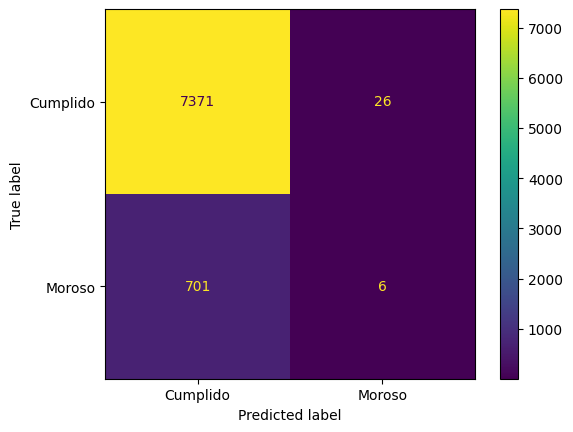

In [ ]:
visualizacion = ConfusionMatrixDisplay(confusion_matrix=matriz_confusion, display_labels=['Cumplido', 'Moroso'])
visualizacion.plot();

In [ ]:
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier(n_estimators=10)
RFC.fit(X_train,y_train)

RandomForestClassifier(n_estimators=10)

In [ ]:
print(f'Exactitud del modelo RFC con el entrenamiento: {RFC.score(X_train,y_train)}')
print(f'Exactitud del modelo RFC con la validacion: {RFC.score(X_val,y_val)}')

Exactitud del modelo RFC con el entrenamiento: 0.98397212543554
Exactitud del modelo RFC con la validacion: 0.9128124727811167


In [ ]:
y_RFC = RFC.predict(X_val)
matriz_confusion = confusion_matrix(y_true = y_val, y_pred = y_RFC)
print(matriz_confusion)

[[10422    57]
 [  944    58]]


## <font color='dark'>Métricas de evaluación</h1>

### Exactitud, precisión y recall (sensibilidad).

<a href="https://ibb.co/351SbY7t"><img src="https://i.ibb.co/wZypqrRD/matriz-confusion.png" alt="matriz-confusion" border="0"></a>

<a href="https://imgbb.com/"><img src="https://i.ibb.co/6Jp6rKyC/Captura-de-tela-2025-03-22-120744.png" alt="Captura-de-tela-2025-03-22-120744" border="0"></a>

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [ ]:
print(f'La precision del modelo es: {precision_score(y_test,y_previsto)}')
print(f'La precision del modelo es: {recall_score(y_test,y_previsto)}')
print(f'La precision del modelo es: {accuracy_score(y_test,y_previsto)}')

La precision del modelo es: 0.1875
La precision del modelo es: 0.008486562942008486
La precision del modelo es: 0.9102912142152023


In [ ]:
print(f'El F1-score del modelo es: {f1_score(y_test,y_previsto)}')

El F1-score del modelo es: 0.016238159675236806


### Curva ROC

In [ ]:
from IPython.display import Image
Image(url='https://raw.githubusercontent.com/dariyasydykova/open_projects/master/ROC_animation/animations/cutoff.gif')

Fuente: [paulvanderlaken.com](https://paulvanderlaken.com/2019/08/16/roc-auc-precision-and-recall-visually-explained/)




In [ ]:
from sklearn.metrics import RocCurveDisplay

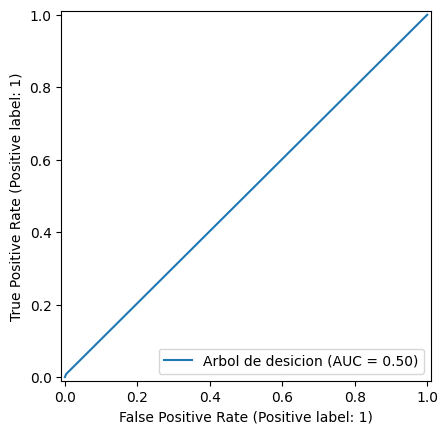

In [ ]:
RocCurveDisplay.from_predictions(y_test,y_previsto,name='Arbol de desicion')

In [ ]:
from sklearn.metrics import roc_auc_score

In [ ]:
print(f'El area bajo la curva ROC es : {roc_auc_score(y_test,y_previsto)}')

El area bajo la curva ROC es : 0.5024858122267161


### Curva de  precisión x sensibilidad

In [ ]:
Image(url='https://paulvanderlaken.com/wp-content/uploads/2019/08/roc.gif')

Fuente: [paulvanderlaken.com](https://paulvanderlaken.com/2019/08/16/roc-auc-precision-and-recall-visually-explained/)


In [ ]:
from sklearn.metrics import PrecisionRecallDisplay

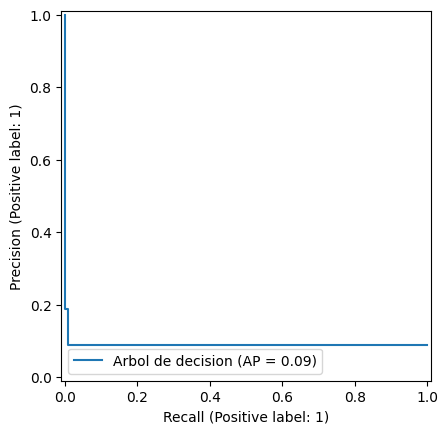

In [ ]:
PrecisionRecallDisplay.from_predictions(y_test,y_previsto, name='Arbol de decision')

In [ ]:
from sklearn.metrics import average_precision_score

In [ ]:
print(f'El score promedio de precision vs recal es: {average_precision_score(y_test,y_previsto)}')

El score promedio de precision vs recal es: 0.0880917241350422


### Informe de métricas

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test,y_previsto))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95      7397
           1       0.19      0.01      0.02       707

    accuracy                           0.91      8104
   macro avg       0.55      0.50      0.48      8104
weighted avg       0.85      0.91      0.87      8104



 ## <font color='dark'> Validación cruzada</h1>

### Usando KFold

La validación del modelo de clasificación a partir de la separación de los datos en conjuntos de entrenamiento y validación hace que el resultado dependa en gran medida de esta división. Puede suceder que, de forma aleatoria, el patrón de los datos de validación sea diferente al de los datos de entrenamiento, lo que podría llevar a obtener un resultado mucho mejor o mucho peor que la realidad simplemente por suerte o mala suerte.  

Teniendo esto en cuenta, es posible utilizar la **validación cruzada**, una estrategia más consistente y ampliamente utilizada en proyectos de *machine learning*.  

En la validación cruzada, en lugar de separar los datos en entrenamiento y validación una sola vez, se dividen en varias partes de igual tamaño. En cada una de estas divisiones, se usa una parte para validación y todas las demás para entrenamiento. Este proceso se repite hasta que todas las partes hayan sido utilizadas tanto para validación como para entrenamiento.  

Se generará un modelo para cada una de estas divisiones y la evaluación del desempeño se realizará promediando la métrica de cada modelo. Esto elimina la dependencia de la separación de los datos, ya que hay una mayor variación en la selección de los mismos y se obtiene un valor medio.  

Generalmente, se utilizan 5 o 10 partes. Un número mayor no suele ser necesario, ya que implica un procesamiento más costoso, y valores menores ya ayudan a mitigar el problema de la selección de los datos.

<a href="https://ibb.co/KcBtshJR"><img src="https://i.ibb.co/nq4X1mFZ/train-y-validacion.png" alt="train-y-validacion" border="0"></a>

In [ ]:
from sklearn.model_selection import KFold, cross_validate

In [ ]:
modelo_ = DecisionTreeClassifier(max_depth=10)
KF = KFold(n_splits=5,shuffle=True,random_state=5)
CV_resul = cross_validate(modelo_,X,y,cv=KF)

In [ ]:
CV_resul

{'fit_time': array([0.5359633 , 0.37274218, 0.36613274, 0.39933872, 0.5068295 ]),
 'score_time': array([0.00713801, 0.00380993, 0.00524902, 0.00606608, 0.00588536]),
 'test_score': array([0.90397387, 0.90777439, 0.9113676 , 0.90298345, 0.9070122 ])}

In [ ]:
CV_resul['test_score']

array([0.90397387, 0.90777439, 0.9113676 , 0.90298345, 0.9070122 ])

In [ ]:
promedio = CV_resul['test_score'].mean()
desvio_STD = CV_resul['test_score'].std()
print(f'Promedio de la exactitud: {promedio}')
print(f'Desvio tipico de la exactitud: {desvio_STD}')
print(f'Intervalo de confianza: [{promedio-2*desvio_STD},{min(promedio+2*desvio_STD,1)}]')

Promedio de la exactitud: 0.9066223002205914
Desvio tipico de la exactitud: 0.0029749815058175044
Intervalo de confianza: [0.9006723372089565,0.9125722632322264]


### Validación cruzada con sensibilidad

In [ ]:
def intervalo_confianza(resultados):
  promedio = resultados['test_score'].mean()
  desvio_STD = resultados['test_score'].std()
  return f'El intervalo de confianza es: [{promedio-2*desvio_STD},{min(promedio+2*desvio_STD,1)}]'

In [ ]:
modelo_ = DecisionTreeClassifier(max_depth=10)
KF = KFold(n_splits=5,shuffle=True,random_state=5)
CV_resul = cross_validate(modelo_,X,y,cv=KF,scoring='recall')
CV_resul

{'fit_time': array([0.62948751, 0.778687  , 0.35698485, 0.34712458, 0.35013938]),
 'score_time': array([0.04173231, 0.00900316, 0.00866842, 0.00935507, 0.00919032]),
 'test_score': array([0.02787879, 0.02608696, 0.02233903, 0.01858736, 0.03452528])}

In [ ]:
intervalo_confianza(CV_resul)

'El intervalo de confianza es: [0.01513174464369952,0.0366352193666433]'

##Como desafío, construye un código para generar el intervalo de confianza para cada una de las métricas utilizando la validación cruzada:

In [70]:
CV_resul_all = cross_validate(modelo_,X,y,cv=KF,scoring=['recall','f1','accuracy','precision'])
CV_resul_all

{'fit_time': array([0.58905864, 0.73903728, 0.33771896, 0.34647036, 0.27444386]),
 'score_time': array([0.02317739, 0.02074194, 0.0210371 , 0.02608776, 0.0127573 ]),
 'test_recall': array([0.02787879, 0.02981366, 0.01971091, 0.01858736, 0.03699137]),
 'test_f1': array([0.04967603, 0.05381166, 0.03533569, 0.03296703, 0.06578947]),
 'test_accuracy': array([0.90419162, 0.90810105, 0.91082317, 0.90418118, 0.90722997]),
 'test_precision': array([0.22772277, 0.27586207, 0.17045455, 0.14563107, 0.2970297 ])}

In [71]:
def informe_metricas(resultados):
    for metrica in ['test_accuracy', 'test_recall', 'test_precision', 'test_f1']:
        media = resultados[metrica].mean()
        desvio_estandar = resultados[metrica].std()
        print(f'Intervalo de confianza({metrica}): [{media-2*desvio_estandar}, {min(media+2*desvio_estandar, 1.0)}]')

In [72]:
informe_metricas(CV_resul_all)

Intervalo de confianza(test_accuracy): [0.9018719240582431, 0.9119388689898069]
Intervalo de confianza(test_recall): [0.012984498966646855, 0.040208336414235615]
Intervalo de confianza(test_precision): [0.10657189146625026, 0.34010817158525075]
Intervalo de confianza(test_f1): [0.02321365867889254, 0.07181829364428009]


### Estratificando los datos

In [73]:
from sklearn.model_selection import StratifiedKFold

In [78]:
modelo = DecisionTreeClassifier(max_depth=10)
SKF = KFold(n_splits=5,shuffle=True,random_state=5)
CV_resul = cross_validate(modelo_,X,y,cv=SKF,scoring='recall')
CV_resul

{'fit_time': array([0.53935719, 0.43575788, 0.26960897, 0.24674869, 0.23982978]),
 'score_time': array([0.01223278, 0.01093912, 0.00599718, 0.00642252, 0.00586534]),
 'test_score': array([0.02666667, 0.02484472, 0.02102497, 0.0173482 , 0.03329223])}

In [75]:
intervalo_confianza(CV_resul)

'El intervalo de confianza es: [0.013244622824279883,0.038468343791134986]'

## <font color='dark'>Balanceo de los datos</h1>

### Oversampling

https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html#id1

### Pipeline para validación

### Undersampling

https://imbalanced-learn.org/stable/references/generated/imblearn.under_sampling.NearMiss.html

### Probando el modelo

# **Desafio** Diabetes

## 1 - Para la construcción de un modelo de machine learning se necesitan datos. Como tarea inicial, realiza la lectura de la base de datos de diabetes y divide los datos en variables explicativas y variable objetivo (x e y). La variable objetivo es la columna que quieres clasificar, que contiene la información de si el paciente tiene o no diabetes. Las variables explicativas son todas las columnas excepto la de diabetes. La separación de los datos se puede hacer con la selección de columnas con pandas.

In [ ]:
DF_d = pd.read_csv('diabetes.csv')

In [ ]:
DF_d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 394 entries, 0 to 393
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   glicemia                  394 non-null    int64  
 1   presion_sanguinea         394 non-null    int64  
 2   grasa_subcutanea_triceps  394 non-null    int64  
 3   insulina                  394 non-null    float64
 4   imc                       394 non-null    float64
 5   diabetes                  394 non-null    int64  
dtypes: float64(2), int64(4)
memory usage: 18.6 KB


In [ ]:
X_d = DF_d.drop(columns = 'diabetes')
y_d = DF_d.diabetes

## 2 - Una etapa muy importante en proyectos de clasificación es la validación de los modelos, para identificar si hay una generalización del modelo para datos nuevos. Realiza la división de los datos entre entrenamiento, validación y prueba. Utiliza el 5% de los datos para prueba y con el resto, deja el 25% para validación. En el momento de la separación, usa el parámetro stratify a partir de la variable objetivo para mantener la proporción de los datos.

In [ ]:
#from sklearn.model_selection import train_test_split
X_d, X_d_test, y_d, y_d_test = train_test_split(X_d, y_d, stratify = y_d, test_size = 0.05, random_state = 5)
X_d_train, X_d_val, y_d_train, y_d_val = train_test_split(X_d, y_d, stratify = y_d, random_state = 5)

## 3 - La etapa de modelado de datos consiste en utilizar un algoritmo capaz de identificar patrones en los datos y clasificar los valores. A partir del modelo es posible extraer una tasa de acierto para entender su desempeño. Crea 2 modelos utilizando los algoritmos DecisionTreeClassifier y RandomForestClassifier y evalúa la precisión de entrenamiento y prueba, eligiendo el valor 3 para el parámetro max_depth del algoritmo **DecisionTreeClassifier** y el valor 2 para el max_depth del algoritmo **RandomForestClassifier**, para que los modelos no se especialicen demasiado en el patrón de los datos de entrenamiento.

In [ ]:
#from sklearn.ensemble import RandomForestClassifier
#from sklearn.tree import DecisionTreeClassifier
modelo_d_DTC = DecisionTreeClassifier(max_depth=3)
modelo_d_RFC = RandomForestClassifier(max_depth=2)

In [ ]:
#Arbol de clasificacion
modelo_d_DTC.fit(X_d_train,y_d_train)
print(f'Score Decision Tree en Train: {modelo_d_DTC.score(X_d_train,y_d_train)}')
print(f'Score Decision Tree en Val: {modelo_d_DTC.score(X_d_val,y_d_val)}')

Score Decision Tree en Train: 0.7571428571428571
Score Decision Tree en Val: 0.776595744680851


In [ ]:
#Random Forest
modelo_d_RFC.fit(X_d_train,y_d_train)
print(f'Score R_Forest Tree en Train: {modelo_d_RFC.score(X_d_train,y_d_train)}')
print(f'Score R_Forest Tree en Val: {modelo_d_RFC.score(X_d_val,y_d_val)}')

Score R_Forest Tree en Train: 0.7214285714285714
Score R_Forest Tree en Val: 0.6808510638297872


## 4 - La tasa de acierto generalmente no proporciona información suficiente para entender el comportamiento del modelo. La matriz de confusión es una herramienta más completa, capaz de proporcionar los aciertos y errores del modelo para cada clase. Construye una matriz de confusión para cada uno de los modelos para evaluar el desempeño de la predicción. Para construir la matriz, usa el método predict para generar las predicciones de los valores y comparar con los valores reales de la base de datos.



In [ ]:
#from sklearn.metrics import ConfusionMatrixDisplay

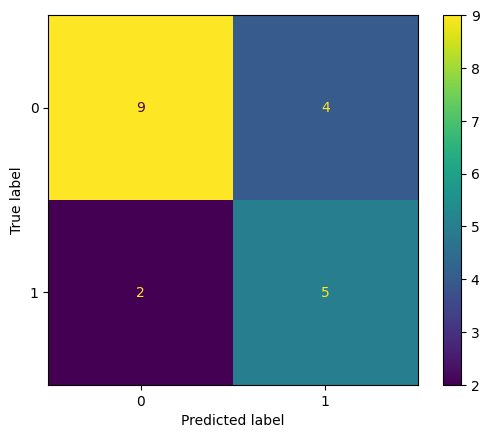

In [ ]:
prediccion_Tree = modelo_d_DTC.predict(X_d_test)
ConfusionMatrixDisplay.from_predictions(y_d_test, prediccion_Tree);

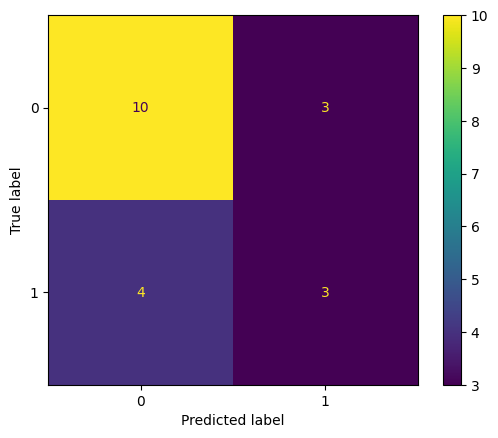

In [ ]:
prediccion_RForest = modelo_d_RFC.predict(X_d_test)
ConfusionMatrixDisplay.from_predictions(y_d_test, prediccion_RForest);

## 5 - Para una evaluación completa de un modelo de clasificación, podemos explorar métricas que evalúan la tasa de acierto general y también para cada clase de la variable objetivo de forma individual. Extrae las métricas de precisión, recall, precisión y F1-Score de los modelos de clasificación generados en el desafío de la clase 1. La biblioteca Scikit-Learn tiene funciones para calcular cada una de las métricas, solo necesitas importar y utilizar como parámetros los valores reales y previstos por el modelo.

In [ ]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

In [ ]:
print(f'Precisión (Decision Tree): {accuracy_score(y_d_test, prediccion_Tree)}')
print(f'Recall (Decision Tree): {recall_score(y_d_test, prediccion_Tree)}')
print(f'Precisión (Decision Tree): {precision_score(y_d_test, prediccion_Tree)}')
print(f'F1_Score (Decision Tree): {f1_score(y_d_test, prediccion_Tree)}')

Precisión (Decision Tree): 0.7
Recall (Decision Tree): 0.7142857142857143
Precisión (Decision Tree): 0.5555555555555556
F1_Score (Decision Tree): 0.625


In [ ]:
print(f'Precisión (Random Forest): {accuracy_score(y_d_test, prediccion_RForest)}')
print(f'Recall (Random Forest): {recall_score(y_d_test, prediccion_RForest)}')
print(f'Precisión (Random Forest): {precision_score(y_d_test, prediccion_RForest)}')
print(f'F1_Score (Random Forest): {f1_score(y_d_test, prediccion_RForest)}')

Precisión (Random Forest): 0.65
Recall (Random Forest): 0.42857142857142855
Precisión (Random Forest): 0.5
F1_Score (Random Forest): 0.46153846153846156


## 6 - Además de métricas numéricas, se pueden explorar gráficos para evaluar el rendimiento de un modelo y comprender si puede diferenciar bien una clase de otra. Obtén la curva ROC y la métrica AUC de los modelos de clasificación generados en el desafío de la clase 1, comparando las curvas en el mismo gráfico. La curva ROC se puede generar usando el método RocCurveDisplay.from_predictions.

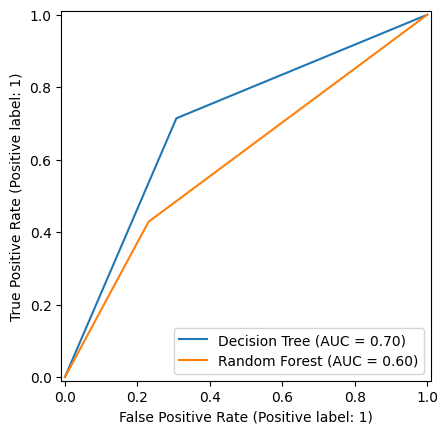

In [ ]:
#from sklearn.metrics import RocCurveDisplay, roc_auc_score
curva_roc = RocCurveDisplay.from_predictions(y_d_test, prediccion_Tree, name = 'Decision Tree')
curva_roc = RocCurveDisplay.from_predictions(y_d_test, prediccion_RForest, name = 'Random Forest', ax = curva_roc.ax_)

In [ ]:
#AUC de los dos modelos
print(f'AUC (Decision Tree): {roc_auc_score(y_d_test, prediccion_Tree)}')
print(f'AUC (Random Forest): {roc_auc_score(y_d_test, prediccion_RForest)}')

AUC (Decision Tree): 0.7032967032967034
AUC (Random Forest): 0.5989010989010989


## 7 - Además de la curva ROC, la curva de precisión x recall se puede usar para evaluar el rendimiento de modelos, siendo más interesante para datos desbalanceados. Obtén la curva de precisión x recall y la métrica AP de los modelos de clasificación generados en el desafío de la clase 1, comparando las curvas en el mismo gráfico. La curva de precisión x recall se puede generar usando el método PrecisionRecallDisplay.from_predictions.

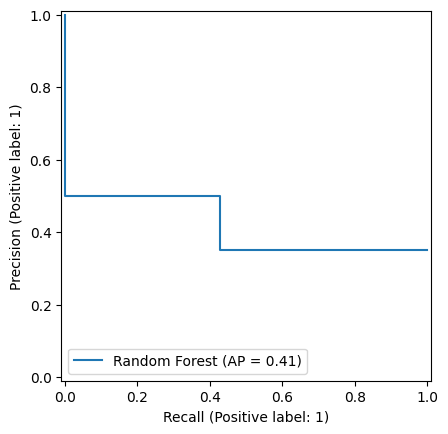

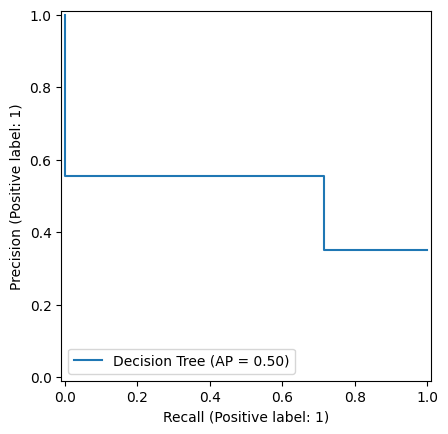

In [ ]:
curva_precision_recall_1 = PrecisionRecallDisplay.from_predictions(y_d_test, prediccion_RForest, name = 'Random Forest')
curva_precision_recall = PrecisionRecallDisplay.from_predictions(y_d_test, prediccion_Tree, name = 'Decision Tree')

In [ ]:
print(f'AP (Decision Tree): {average_precision_score(y_d_test, prediccion_Tree)}')
print(f'AP (Random Forest): {average_precision_score(y_d_test, prediccion_RForest)}')

AP (Decision Tree): 0.49682539682539684
AP (Random Forest): 0.41428571428571426


## 8 - Un resumen de las principales métricas de clasificación puede ser muy útil para resumir la información y generar insights de forma rápida. Genera los informes de métricas de los modelos de clasificación construidos en el desafío de la clase 1. El informe de métricas se puede generar a partir de la función classification_report de la biblioteca Scikit-Learn.



In [ ]:
#from sklearn.metrics import classification_report
print('Decision Tree')
print(classification_report(y_d_test, prediccion_Tree))
print('Random Forest')
print(classification_report(y_d_test, prediccion_RForest))

Decision Tree
              precision    recall  f1-score   support

           0       0.82      0.69      0.75        13
           1       0.56      0.71      0.62         7

    accuracy                           0.70        20
   macro avg       0.69      0.70      0.69        20
weighted avg       0.73      0.70      0.71        20

Random Forest
              precision    recall  f1-score   support

           0       0.71      0.77      0.74        13
           1       0.50      0.43      0.46         7

    accuracy                           0.65        20
   macro avg       0.61      0.60      0.60        20
weighted avg       0.64      0.65      0.64        20



## 9 - Crea una función para calcular el intervalo de confianza de los resultados de una validación cruzada con 2 desviaciones estándar. La función necesita 2 parámetros: uno para recibir una lista con los resultados de las métricas de la validación cruzada y otro para recibir el nombre del algoritmo. Para generar el intervalo de confianza, extrae la media de los resultados de la lista y la desviación estándar. El intervalo de confianza debe ser presentado en un print con el valor mínimo siendo la media restada de 2 desviaciones estándar y el valor máximo siendo la media sumada de 2 desviaciones estándar.

Ejemplo de retorno de la función: **Intervalo de confianza ("nombre del modelo"): ["valor mínimo del intervalo", "valor máximo del intervalo"]**

In [76]:
def trust_interval(model_name,result):
  mean = result['test_score'].mean()
  std = result['test_score'].std()
  return f'Intervalo de confianza {model_name}: [{mean-2*std},{min(mean + 2*std,1)}]'

## 10 - Evalúa el desempeño de los modelos con un intervalo de confianza utilizando la validación cruzada con el método KFold, usando 10 partes, con el uso del parámetro n_splits y mezclando los datos antes de la separación con el parámetro shuffle. Usa el método cross_val_score que no retorna el tiempo de ejecución, solo las métricas.

In [91]:
from sklearn.model_selection import KFold, cross_val_score
KF_d = KFold(n_splits = 5,
                      shuffle = True,
                      random_state = 5)
CV_resul_DTC = cross_val_score(modelo_d_DTC,
                              X_d,y_d,
                              cv=KF_d)
CV_resul_RFC = cross_validate(modelo_d_RFC,
                              X_d,y_d,
                              cv=KF_d)


## 11 - Evalúa el desempeño de los modelos con un intervalo de confianza utilizando la validación cruzada (cross_val_score) con el método StratifiedKFold, usando el parámetro n_splits y mezclando los datos antes de la separación con el parámetro shuffle y evaluando la métrica F1-Score usando el parámetro scoring.

In [90]:
from sklearn.model_selection import StratifiedKFold
SKF_d = StratifiedKFold(n_splits = 5,
                      shuffle = True,
                      random_state = 5)
CV_resul_DTC_S = cross_val_score(modelo_d_DTC,
                              X_d,y_d,
                              cv=SKF_d)
CV_resul_RFC_S = cross_validate(modelo_d_RFC,
                              X_d,y_d,
                              cv=SKF_d)


## 12 - En conjuntos de datos con pocos registros (pocas filas), las estrategias de separación de los datos para validación pueden hacer que quede poca información en los datos de entrenamiento, haciendo que el modelo no comprenda bien el patrón de los datos. El LeaveOneOut es una estrategia para sortear este problema, utilizando solo un registro como dato de validación. Evalúa el desempeño de los modelos utilizando la validación cruzada (cross_val_score) con el método LeaveOneOut.

El método LeaveOneOut generará un modelo para cada una de las filas de la base de datos, por

In [88]:
from sklearn.model_selection import cross_val_score, LeaveOneOut

In [92]:
arbol = DecisionTreeClassifier(max_depth = 3)
random_forest = RandomForestClassifier(max_depth = 2)

loo = LeaveOneOut()

resultado_arbol = cross_val_score(arbol, X_d,y_d, cv = loo)
resultado_rf = cross_val_score(random_forest, X_d,y_d, cv = loo)

print(f'Precisión media (Decision Tree): {resultado_arbol.mean()}')
print(f'Precisión media (Random Forest):{resultado_rf.mean()}')

Precisión media (Decision Tree): 0.7085561497326203
Precisión media (Random Forest):0.6818181818181818
